# Resume Job Postings

4. Evaluating skills requirements vs resume

In [11]:
# Setup
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
# Load files from previous steps
cluster_labels_df = pd.read_pickle('cluster_labels_df.pk')
bullet_point_df = pd.read_pickle('bullet_point_df.pk')
# Clusters defined in previous step
clusters = 5

In [13]:
# Checking shape of both files
cluster_labels_df.shape
bullet_point_df.shape

(1730, 1)

In [14]:
# Combine skill clusters
def get_cluster_words(df_cluster):
    indices = df_cluster.index.values
    cluster_words = ' '.join(bullet_point_df.loc[indices, 'bullet_point'])
    
    return cluster_words

In [15]:
skill_cluster_texts = []

for c in range(clusters):
    df_cluster = cluster_labels_df[cluster_labels_df.Cluster == c]
    cluster_words = get_cluster_words(df_cluster)
    skill_cluster_texts.append(cluster_words)

In [16]:
# Skills section from resume
resume_skills = 'Python, Pandas, machine learning, natural language processing'

In [17]:
skill_cluster_texts.append(resume_skills)

In [18]:
# Apply TFIDF
skills_vectorizer = TfidfVectorizer(stop_words='english')
skills_tfidf = skills_vectorizer.fit_transform(skill_cluster_texts)

# Calculate cosine distances to resume skills
cos_dists = cosine_similarity(skills_tfidf[:-1, :], skills_tfidf[-1, :])

In [20]:
print(skills_tfidf.shape)
print(cos_dists.shape)

(6, 2647)
(5, 1)


In [21]:
# the cos_dists variable has one column, so we flatten it to enable adding it to our DataFrame
skills_df = pd.DataFrame({'cluster': range(1, 6), 'text': skill_cluster_texts[:-1],'cosine_distance': cos_dists.flatten()})
skills_df.sort_values(by='cosine_distance', ascending=False, inplace=True)
skills_df.reset_index(inplace=True, drop=True)

In [22]:
# Print df
skills_df

,cluster,text,cosine_distance
0,4,"Highly advanced skills, and extensive experien...",0.459360
1,5,In depth skills and experience with independen...,0.215420
2,3,Strong collaboration skills with highly techni...,0.062891
3,2,Ability to curate/clean/organize large and mes...,0.025865
4,1,"Demonstrated ability to propose, initiate, and...",0.019350


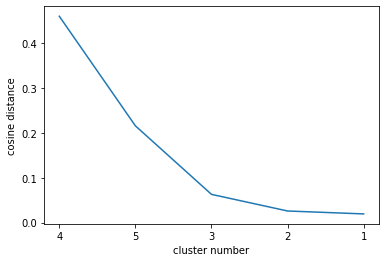

In [23]:
plt.plot(skills_df.index, skills_df['cosine_distance'])
plt.xticks(skills_df.index, skills_df['cluster'])
plt.xlabel('cluster number')
_ = plt.ylabel('cosine distance')

In [24]:
# Checking the least similar clusters 
cluster_indices = skills_df.iloc[2:]['cluster'].values - 1
cluster_indices

array([2, 1, 0], dtype=int64)

In [27]:
# set the random seed for reproducible bullet point sampling
np.random.seed(2)
for c in cluster_indices:
    print('cluster {}'.format(c + 1))
    # reverse the dictionary from {words: index} to {index: words}
    word_index_dict = skills_vectorizer.vocabulary_
    index_word_dict = {index: word for word, index in word_index_dict.items()}
    # gets a 1-D array of TFIDF values for the cluster the TFIDF vector is a sparse array, so we convert it to a numpy array
    # and flatten it to a single dimension so we can convert it to a dictionary of {word: tfidf} pairs
    skills_tfidf_array = skills_tfidf[c, :].toarray().flatten()
    # create {word: TFIDF_value} dictionary
    skills_tfidf_scores = {index_word_dict[i]: tfidf for i, tfidf in enumerate(skills_tfidf_array)}
    # sort from greatest to least TFIDF values and take the top 15 values
    sorted_skills_tfidf_scores = {k: v for k, v in sorted(skills_tfidf_scores.items(), key=lambda item:-item[1])[:15]}
    print('; '.join(sorted_skills_tfidf_scores.keys()))
    print('\n')
    print('some sample bullets:')
    for i in range(4):
        cluster_idxs = cluster_labels_df[cluster_labels_df['Cluster'] == c].index.values
        print('-', np.random.choice(bullet_point_df.loc[cluster_idxs]['bullet_point'].values))
        #print('\n\n')

cluster 3
degree; science; computer; mathematics; field; statistics; related; phd; master; engineering; data; experience; physics; quantitative; bachelor


some sample bullets:
- Bachelor's Degree in computer sciences or related field
- Statistics
- PhD degree preferred
- Bachelor’s degree in Computer Science, Information Science, Mathematics, Physics or related discipline and 4 – 7 years of experience in that field. Master’s degree with 3 – 6 years of experience.
cluster 2
data; analysis; science; sources; experience; using; mining; models; sets; product; analytic; large; develop; business; work


some sample bullets:
- Established track record with data wrangling and data transformation
- Ability to support any data-related operational tasks across the organization
- Promote collaboration with other data science teams within the enterprise, encourage reuse of artifacts. Train business teams on basic data science principles and techniques.
- Experience with converting & writing distri